In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Mycovid.zip'

Archive:  /content/drive/MyDrive/Mycovid.zip
   creating: Mycovid/
   creating: Mycovid/Test/
   creating: Mycovid/Test/Covid-19-N/
  inflating: Mycovid/Test/Covid-19-N/aug_1.jpg  
  inflating: Mycovid/Test/Covid-19-N/aug_10.jpg  
  inflating: Mycovid/Test/Covid-19-N/aug_11.jpg  
  inflating: Mycovid/Test/Covid-19-N/aug_12.jpg  
  inflating: Mycovid/Test/Covid-19-N/aug_13.jpg  
  inflating: Mycovid/Test/Covid-19-N/aug_14.jpg  
  inflating: Mycovid/Test/Covid-19-N/aug_15.jpg  
  inflating: Mycovid/Test/Covid-19-N/aug_16.jpg  
  inflating: Mycovid/Test/Covid-19-N/aug_17.jpg  
  inflating: Mycovid/Test/Covid-19-N/aug_18.jpg  
  inflating: Mycovid/Test/Covid-19-N/aug_19.jpg  
  inflating: Mycovid/Test/Covid-19-N/aug_2.jpg  
  inflating: Mycovid/Test/Covid-19-N/aug_20.jpg  
  inflating: Mycovid/Test/Covid-19-N/aug_21.jpg  
  inflating: Mycovid/Test/Covid-19-N/aug_22.jpg  
  inflating: Mycovid/Test/Covid-19-N/aug_23.jpg  
  inflating: Mycovid/Test/Covid-19-N/aug_3.jpg  
  inflating: Mycovid/

In [ ]:
%cd Mycovid/

/content/Mycovid


In [ ]:
import numpy as np

In [ ]:
!pip install scikit-learn==0.20.2
!pip install tensorflow==2.2.0
!pip install matplotlib==3.0.2
!pip install Keras==2.3.1
!pip install Pillow==5.4.1

     |████████████████████████████████| 5.4MB 17.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 516.2MB 32kB/s 
     |████████████████████████████████| 460kB 44.8MB/s 
     |████████████████████████████████| 3.0MB 27.9MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1
     |████████████████████████████████| 12.9MB 29.6MB/s 
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.2 which is incompatible.
ERROR: mizani 0.6.0 ha

     |████████████████████████████████| 378kB 17.2MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 2.0MB 15.8MB/s 
ERROR: bokeh 2.3.2 has requirement pillow>=7.1.0, but you'll have pillow 5.4.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [ ]:
train_path = '/content/CNN/Train'
val_path = '/content/CNN/valid'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [ ]:
traindata = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

testdata = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = traindata.flow_from_directory(
    '/content/CNN/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 809 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid-19-N': 0, 'Covid-19-P': 1}

In [ ]:
val_generator = testdata.flow_from_directory(
    '/content/CNN/Test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 46 images belonging to 2 classes.


In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [ ]:
import os

In [ ]:
hist = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    validation_steps=2

)

Epoch 1/20


OSError: ignored

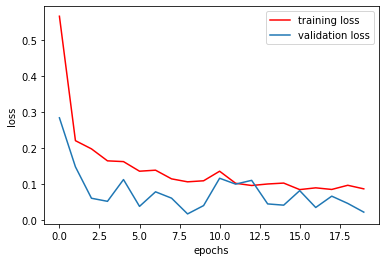

In [ ]:
from matplotlib import pyplot as plt

plt.plot(hist.history['loss'],'r',label='training loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

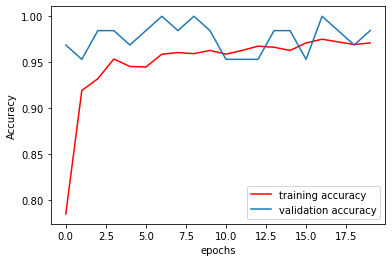

In [ ]:
plt.plot(hist.history['accuracy'],'r',label='training accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print("training_accuracy", hist.history['accuracy'][-1])
print("validation_accuracy", hist.history['val_accuracy'][-1])

training_accuracy 0.9709471464157104
validation_accuracy 0.984375


In [ ]:
print("training loss", hist.history['loss'][-1])
print("validation loss", hist.history['val_loss'][-1])

training loss 0.08724293857812881
validation loss 0.02247922308743


In [ ]:
pred= model.predict(val_generator)
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
label = val_generator.classes

In [ ]:
labels = (val_generator.class_indices)

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
cf

array([[136,  64],
       [  0,   0]], dtype=int64)

In [ ]:
import pandas as pd

exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,All
Actual,,
0,136,136
1,64,64
All,200,200


In [ ]:
path = "Your_test_image_path"
img= image.load_img(path,target_size=(224,224))

img = image.img_to_array(img)/255
img = np.array([img])
img.shape

(1, 224, 224, 3)

In [ ]:
model.predict_classes(img)

C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]])